In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')

In [3]:
data.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
data.shape

(18249, 14)

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
data.tail(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18229,4,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,5,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,6,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,11,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West
18237,0,2018-03-25,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,organic,2018,WestTexNewMexico
18238,1,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,2018,WestTexNewMexico


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
data = data.drop('Unnamed: 0',axis = 1)

In [11]:
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [12]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)

In [13]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


(dissertation)
1. Abstract 
(stats, data analysis, ML)
(this dissertation involves avocado... , data analysis, applies ......ML algorithms to predict future prices)...

2. Contents (1.2.3.4)

3. Chapter 1 (introduction)
  1.1 Overview of the problem 1.5page
  1.2 Outline of the dissertation ()
  
4. Chapter 2 Machine Learning Algorithms 

5. Chapter 3 (data analysis)
7. Chapter 4 (performances of different algorithms)
8. Chapter 5 (Conclusion)

www.overleaf.com


Data Visualisation

In [14]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file = 'report avocado.html')


In [15]:
avo_type=data.groupby('type')['Total Volume'].agg('sum')

<AxesSubplot:xlabel='type'>

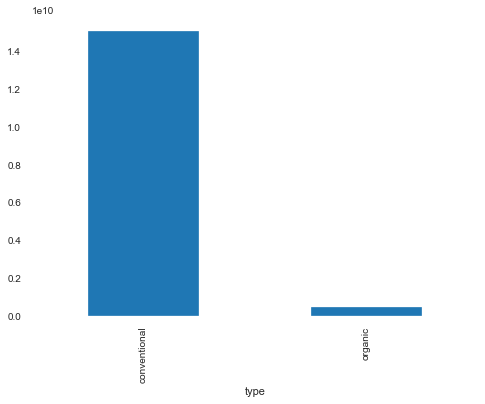

In [16]:
avo_type.plot.bar()

In [17]:
data_avprice = data['AveragePrice']

<AxesSubplot:>

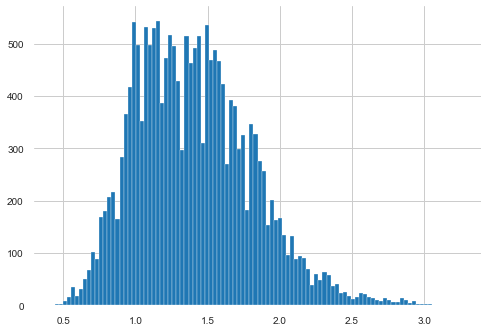

In [18]:
data_avprice.hist(bins = 100)

<BarContainer object of 18249 artists>

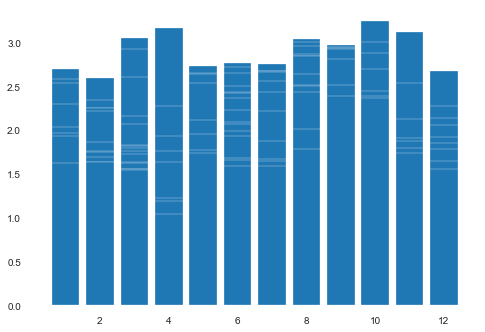

In [19]:
plt.bar(data['Month'], data['AveragePrice'])

<AxesSubplot:xlabel='Date'>

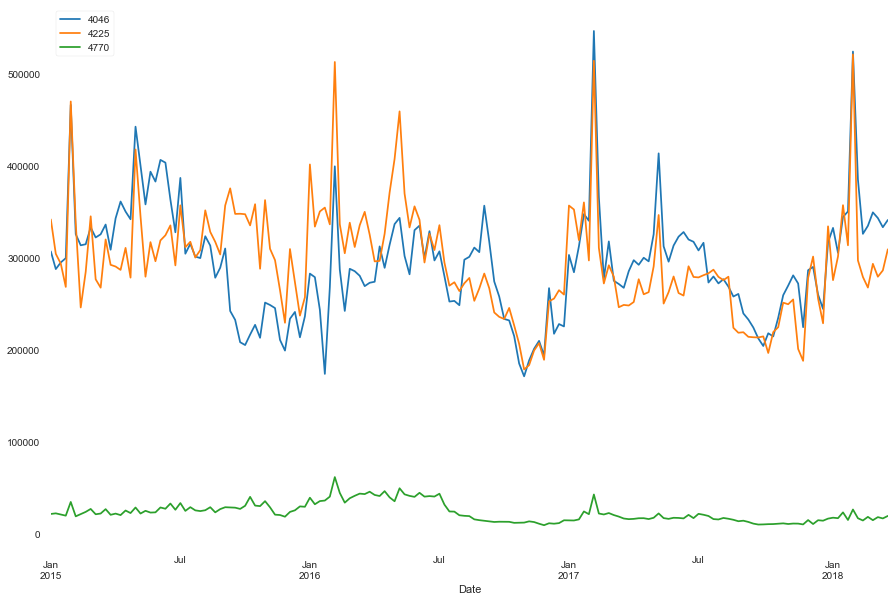

In [20]:
data_date=data.groupby('Date').mean()
plt.figure(figsize=(15,10))
ax = plt.gca()
data_date['4046'].plot(x = 'date', y = '4046', ax = ax, legend = True)
data_date['4225'].plot(x = 'date', y = '4225', ax = ax, legend = True)
data_date['4770'].plot(x = 'date', y = '4770', ax = ax, legend = True)


In [21]:
data_region = data.groupby('region').mean()

<AxesSubplot:xlabel='region'>

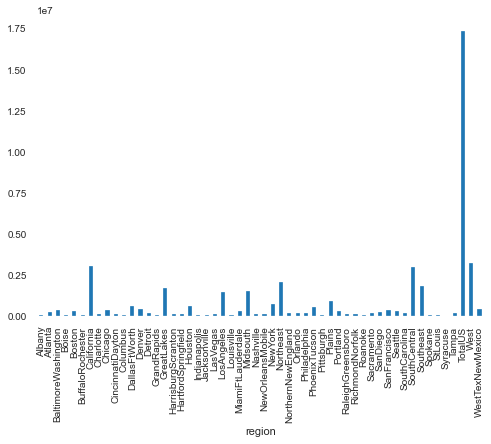

In [22]:
data_region['Total Volume'].plot.bar()

<AxesSubplot:xlabel='region'>

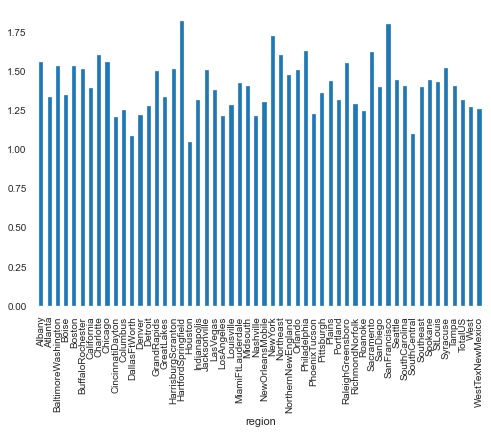

In [23]:
data_region['AveragePrice'].plot.bar()

In [25]:
# We also need to transform categorical variables 'Type' and 'Region' 
# We also need to transform date varibale into feature for which regression can be used.
import datetime as dt
dummies_type = pd.get_dummies(data.type)
dummies_region = pd.get_dummies(data.region)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(dt.datetime.toordinal)
data1 = data.drop(['Month', 'region', 'type'], axis = 1)
data2 = data1.join(dummies_type)
data_forML = data2.join(dummies_region)

In [26]:
data_forML

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,736729,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0,0,0,0,0,0,0,0,0,1
18245,736722,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,736715,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
x = data_forML.drop('AveragePrice', axis = 1)
y = data_forML['AveragePrice']
def give_me_a_straight_line(x,y):
    w, b  = np.polyfit(x,y,deg=1)
    line  = w * x + b
    return line

Linear Regression: Mean Squared Error: 0.06608581284329056
Lieanr Regression: Root Mean Squared Error: 0.25707161034095255


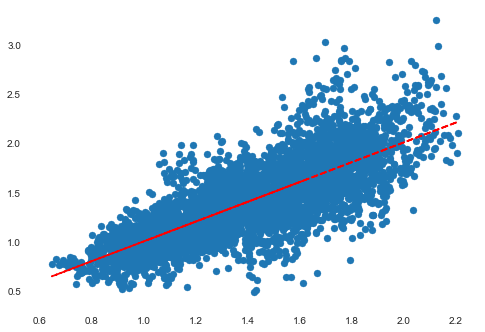

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


regr=LinearRegression()
regr.fit(x_train,y_train)
price_regr=regr.predict(x_test)
print('Linear Regression: Mean Squared Error:', metrics.mean_squared_error(y_test, price_regr))
print('Lieanr Regression: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, price_regr)))
plt.scatter(price_regr, y_test, )
line_regr = give_me_a_straight_line(price_regr,y_test)
plt.plot(price_regr, line_regr, 'r--')

In [38]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,736729,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,736722,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,736715,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


Decision Tree Regressor: Mean Squared Error: 0.027198641244795086
Decision Tree Regressor: Root Mean Square Error: 0.16492010564147444


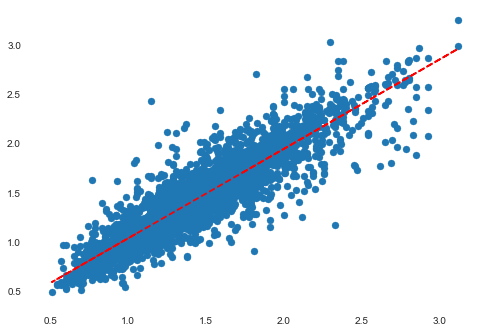

In [45]:
from sklearn.tree import DecisionTreeRegressor
decisiontree=DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)
price_tree=decisiontree.predict(x_test)
print('Decision Tree Regressor: Mean Squared Error:', metrics.mean_squared_error(y_test, price_tree))
print('Decision Tree Regressor: Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, price_tree)))
plt.scatter(price_tree, y_test)
line_tree = give_me_a_straight_line(price_tree,y_test)
plt.plot(price_tree, line_tree, 'r--')

Random Forest Regressor: Mean Squared Error: 0.013237260238877932
Random Forest Regressor: Root Mean Square Error: 0.11505329303795668


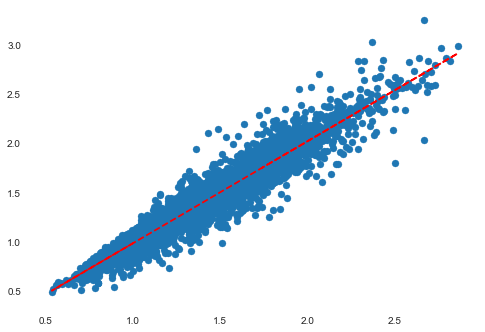

In [46]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()
randomforest.fit(x_train,y_train)
price_forest=randomforest.predict(x_test)
print('Random Forest Regressor: Mean Squared Error:', metrics.mean_squared_error(y_test, price_forest))
print('Random Forest Regressor: Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, price_forest)))
plt.scatter(price_forest, y_test)
line_forest = give_me_a_straight_line(price_forest,y_test)
plt.plot(price_forest, line_forest, 'r--')